# Problem

The file "cats.csv" contains data with details of 300 different cats. These data should be used to create a predictive model that can be used to predict the life expectancy, in years, of any cat. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('cats.csv')

In [3]:
data.head()

,Unnamed: 0,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
0,0,7.0,Siamese,2009-08-02 14:02:18,0.883886,21.611951,5,4.0
1,1,9.0,Siamese,2013-11-27 19:08:52,1.221535,26.451956,10,4.0
2,2,8.0,Manx,2016-01-12 04:39:24,0.967718,18.540191,10,5.0
3,3,8.0,Maine Coon,2000-11-24 18:51:18,1.090641,16.564362,12,7.0
4,4,8.0,Maine Coon,2014-07-03 22:17:26,1.004712,22.535495,7,7.0


In [4]:
data.tail()

,Unnamed: 0,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
295,295,8.0,Manx,2006-01-06 11:52:45,0.878575,26.812670,14,1.0
296,296,8.0,Manx,1997-10-24 15:06:57,1.041003,16.920258,5,4.0
297,297,7.0,Maine Coon,2008-06-06 21:09:50,1.053361,14.106118,9,3.0
298,298,15.0,Maine Coon,1999-09-19 20:19:43,1.063393,12.210901,10,2.0
299,299,11.0,Rex,2012-06-06 10:07:47,1.203201,17.474170,9,4.0


In [5]:
data.columns

Index(['Unnamed: 0', 'age at death', 'breed', 'date of last vet visit',
       'hair length', 'height', 'number of vet visits', 'weight'],
      dtype='object')

'Unnamed: 0' is not important as it iterates the list of entries within the dataset, similarly with the index. So, this column can be dropped. 

In [6]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
data.shape

(300, 7)

In [8]:
data.dtypes

age at death              float64
breed                      object
date of last vet visit     object
hair length               float64
height                    float64
number of vet visits        int64
weight                    float64
dtype: object

The 'date of last vet visit' column is converted to a datetime type as it may be an important feature.

In [9]:
data['date of last vet visit'] = pd.to_datetime(data['date of last vet visit'], errors = 'coerce')

In [10]:
data.dtypes

age at death                     float64
breed                             object
date of last vet visit    datetime64[ns]
hair length                      float64
height                           float64
number of vet visits               int64
weight                           float64
dtype: object

# Outlier and Missing Values Detection

## Numerical Variables

In [11]:
data.describe()

,age at death,hair length,height,number of vet visits,weight
count,299.000000,2.990000e+02,300.000000,300.000000,300.000000
mean,9.006689,3.027706e+09,20.498442,8.296667,3.957667
std,2.892937,5.235392e+10,5.107386,3.820643,2.033624
min,0.000000,6.904537e-01,5.077179,-1.000000,0.000000
25%,7.000000,9.377535e-01,16.958241,6.000000,2.000000
50%,9.000000,1.003253e+00,20.825805,8.000000,4.000000
75%,11.000000,1.067127e+00,24.043067,11.000000,5.250000
max,18.000000,9.052840e+11,33.043014,19.000000,10.000000


The describe function is a valuale method to observe any outliers/incorrect values in the numerical columns of the data. As seen in the table above, an outlier and multiple missing values were discovered in the data. 

- Maximum hair length = $9.05 \times 10^{11}$
- Minimum number of vet visits = $-1$
- Minimum age of death = $0$
- Minimum weight = $0$

In addition, there is a missing entry in 'age at death' and 'hair length' columns.

In [12]:
data.loc[data['hair length'] == data['hair length'].max()]

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
108,10.0,Rex,2012-12-10 03:48:52,9.052840e+11,18.661543,9,2.0


In [13]:
data.loc[data['number of vet visits'] == data['number of vet visits'].min()]

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
57,11.0,Manx,2011-11-12 23:23:01,0.868451,21.647929,-1,2.0
92,7.0,Maine Coon,2007-08-02 16:59:33,0.967941,8.624444,-1,3.0
294,13.0,Javanese,2015-01-27 23:23:42,1.085022,24.610927,-1,4.0


In [14]:
data.loc[data['weight'] == data['weight'].min()]

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
33,6.0,Maine Coon,2007-07-04 02:53:25,0.835610,16.848307,5,0.0
61,6.0,Maine Coon,2002-02-06 06:49:07,0.942037,23.571271,16,0.0
102,17.0,Rex,2007-11-27 07:35:08,1.086447,19.750088,9,0.0
114,11.0,Siamese,2014-08-14 22:01:44,1.190255,17.747619,6,0.0
131,6.0,Rex,2009-07-08 08:12:26,0.933132,20.619181,8,0.0
163,14.0,Maine Coon,2000-04-28 10:14:54,1.096407,22.907829,7,0.0
174,11.0,Maine Coon,2016-08-24 01:54:56,0.842447,15.286063,14,0.0
179,10.0,Manx,2005-08-20 12:28:46,0.909811,24.554019,5,0.0
214,6.0,Manx,2010-08-08 21:45:37,0.937148,12.019150,9,0.0
290,8.0,Javanese,2005-05-16 16:33:16,1.019894,17.027594,0,0.0


In [15]:
data.loc[data['age at death'] == data['age at death'].min()]

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
164,0.0,Rex,2007-07-20 22:28:24,0.936867,14.317804,9,1.0
288,0.0,Javanese,2003-04-07 10:02:49,0.950070,24.419723,10,3.0


In [16]:
missing = data[data.isna().any(axis = 1)]
missing

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
47,8.0,Rex,NaT,1.037497,27.393672,6,6.0
258,NaN,Maine Coon,2010-09-16 08:07:38,0.979556,26.055971,1,8.0
271,6.0,Manx,2001-02-13 02:04:31,NaN,21.520845,7,7.0


In [17]:
anomalies = data.loc[(data['hair length'] == data['hair length'].max()) | 
                     (data['number of vet visits'] == data['number of vet visits'].min()) | 
                     (data['weight'] == data['weight'].min()) | 
                     (data['age at death'] == data['age at death'].min())]

anomalies_and_missing = pd.concat([anomalies, missing])
anomalies_and_missing

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
33,6.0,Maine Coon,2007-07-04 02:53:25,8.356103e-01,16.848307,5,0.0
57,11.0,Manx,2011-11-12 23:23:01,8.684509e-01,21.647929,-1,2.0
61,6.0,Maine Coon,2002-02-06 06:49:07,9.420371e-01,23.571271,16,0.0
92,7.0,Maine Coon,2007-08-02 16:59:33,9.679410e-01,8.624444,-1,3.0
102,17.0,Rex,2007-11-27 07:35:08,1.086447e+00,19.750088,9,0.0
108,10.0,Rex,2012-12-10 03:48:52,9.052840e+11,18.661543,9,2.0
114,11.0,Siamese,2014-08-14 22:01:44,1.190255e+00,17.747619,6,0.0
131,6.0,Rex,2009-07-08 08:12:26,9.331319e-01,20.619181,8,0.0
163,14.0,Maine Coon,2000-04-28 10:14:54,1.096407e+00,22.907829,7,0.0
164,0.0,Rex,2007-07-20 22:28:24,9.368674e-01,14.317804,9,1.0


In [18]:
anomalies_and_missing.shape

(19, 7)

In [19]:
percentage_of_anomalies_and_missing_details = anomalies_and_missing.shape[0] / data.shape[0] * 100
print(f'There are {percentage_of_anomalies_and_missing_details}% of anomalies contained in the data.')

There are 6.333333333333334% of anomalies contained in the data.


## Categorial Variables

In [20]:
data['breed'].value_counts()

Maine Coon    68
Rex           64
Manx          59
Javanese      58
Siamese       50
Donald         1
Name: breed, dtype: int64

There are 6 different breeds recorded within the data. Only one 'Donald' breed is recorded. It may be an incorrect entry. However, due to the fact that I am to build a predictive model to determine the life expectancy of any cat. This 'unique' breed may not affect the predictive model.

In [21]:
donald = data.loc[data['breed'] == 'Donald']
donald

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
28,14.0,Donald,2004-02-02 20:27:11,0.88804,9.72739,5,5.0


In [22]:
to_be_treated = pd.concat([anomalies_and_missing, donald])
to_be_treated

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
33,6.0,Maine Coon,2007-07-04 02:53:25,8.356103e-01,16.848307,5,0.0
57,11.0,Manx,2011-11-12 23:23:01,8.684509e-01,21.647929,-1,2.0
61,6.0,Maine Coon,2002-02-06 06:49:07,9.420371e-01,23.571271,16,0.0
92,7.0,Maine Coon,2007-08-02 16:59:33,9.679410e-01,8.624444,-1,3.0
102,17.0,Rex,2007-11-27 07:35:08,1.086447e+00,19.750088,9,0.0
108,10.0,Rex,2012-12-10 03:48:52,9.052840e+11,18.661543,9,2.0
114,11.0,Siamese,2014-08-14 22:01:44,1.190255e+00,17.747619,6,0.0
131,6.0,Rex,2009-07-08 08:12:26,9.331319e-01,20.619181,8,0.0
163,14.0,Maine Coon,2000-04-28 10:14:54,1.096407e+00,22.907829,7,0.0
164,0.0,Rex,2007-07-20 22:28:24,9.368674e-01,14.317804,9,1.0


In [23]:
to_be_treated.shape

(20, 7)

# Treatment of Outliers, Missing and Incorrect Values

## For the missing datetime

Retracing the 'date of last vet visit' column...

In [24]:
retrace = pd.read_csv('cats.csv')
retrace.drop('Unnamed: 0', axis = 1, inplace = True)
retrace.loc[data['date of last vet visit'].isna()]

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
47,8.0,Rex,2009-22-12 02:43:43,1.037497,27.393672,6,6.0


As seen in the row above, a null value was recorded because there was an errror during the conversion to datetime format. This is because the order of the data is incorrectly recorded. So, this can be easily rectified by fixing the order of date.


In [25]:
data = pd.read_csv('cats.csv')
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.replace('2009-22-12 02:43:43', '2009-12-22 02:43:43',inplace = True)
# Checking that now is in the correct order
data.iloc[[47]]

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
47,8.0,Rex,2009-12-22 02:43:43,1.037497,27.393672,6,6.0


In [26]:
data['date of last vet visit'] = pd.to_datetime(data['date of last vet visit']) 
data.isnull().sum()

age at death              1
breed                     0
date of last vet visit    0
hair length               1
height                    0
number of vet visits      0
weight                    0
dtype: int64

## For the Abnomally Large Hair Length Value

The value may have been a typo. So it can be rectified as the value divided by $10^{12}$.

In [27]:
data.loc[data['hair length'] == data['hair length'].max()]

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
108,10.0,Rex,2012-12-10 03:48:52,9.052840e+11,18.661543,9,2.0


In [28]:
data.replace(data['hair length'].max(), data['hair length'].max() / 1e12,inplace = True)

In [29]:
data.iloc[[108]]

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
108,10.0,Rex,2012-12-10 03:48:52,0.905284,18.661543,9,2.0


## For the Missing Values

For simplicity, the missing values can be dropped.

In [30]:
data.dropna(inplace = True)

In [31]:
data.describe()

,age at death,hair length,height,number of vet visits,weight
count,298.000000,298.000000,298.000000,298.000000,298.000000
mean,9.016779,1.002879,20.476362,8.325503,3.933893
std,2.892528,0.100039,5.114005,3.809180,2.019090
min,0.000000,0.690454,5.077179,-1.000000,0.000000
25%,7.000000,0.937279,16.932919,6.000000,2.000000
50%,9.000000,1.002959,20.769064,8.000000,4.000000
75%,11.000000,1.065565,23.973393,11.000000,5.000000
max,18.000000,1.238662,33.043014,19.000000,10.000000


## For the Minimum Number of Vet Visits

Since I have assumed that the abnormally large hair length value is a typo, these can be typos as well.

In [32]:
# reminder
data.loc[data['number of vet visits'] == data['number of vet visits'].min()]

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
57,11.0,Manx,2011-11-12 23:23:01,0.868451,21.647929,-1,2.0
92,7.0,Maine Coon,2007-08-02 16:59:33,0.967941,8.624444,-1,3.0
294,13.0,Javanese,2015-01-27 23:23:42,1.085022,24.610927,-1,4.0


Drop these entries

In [33]:
to_be_dropped = data.loc[data['number of vet visits'] == data['number of vet visits'].min()]
data.drop(to_be_dropped.index, inplace = True)

In [34]:
#Recheck the minimum value of number vet visits
data.describe()

,age at death,hair length,height,number of vet visits,weight
count,295.000000,295.000000,295.000000,295.000000,295.000000
mean,9.003390,1.003175,20.498551,8.420339,3.943390
std,2.893223,0.100106,5.087124,3.709648,2.025471
min,0.000000,0.690454,5.077179,0.000000,0.000000
25%,7.000000,0.937410,16.945580,6.000000,2.000000
50%,9.000000,1.003253,20.748630,8.000000,4.000000
75%,11.000000,1.065545,23.945353,11.000000,5.000000
max,18.000000,1.238662,33.043014,19.000000,10.000000


In [35]:
data.loc[data['number of vet visits'] == data['number of vet visits'].min()]

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
10,7.0,Javanese,2017-01-03 09:14:13,0.908427,27.825613,0,2.0
199,8.0,Rex,2014-09-26 22:44:54,0.921853,22.166018,0,6.0
209,8.0,Maine Coon,2008-07-14 01:22:33,1.061532,23.430280,0,3.0
275,8.0,Manx,2011-11-06 03:28:46,0.968334,16.970901,0,6.0
290,8.0,Javanese,2005-05-16 16:33:16,1.019894,17.027594,0,0.0


Since there is a date of last visit was recorded, the number of visits should be at least 1. 

As seen in the table, the minimum number of visits is now 0. It is understandable that the cat may have not visited the vet before. However, according to the 'date of last vet visit', these cats did. So these entries are replaced with 1. 

In [36]:
data['number of vet visits'].replace(0, 1, inplace  = True)

## For the Age at Death = 0 and Weight = 0

In [37]:
data.loc[data['age at death'] == data['age at death'].min()]

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
164,0.0,Rex,2007-07-20 22:28:24,0.936867,14.317804,9,1.0
288,0.0,Javanese,2003-04-07 10:02:49,0.950070,24.419723,10,3.0


It is obvious that the age of death is 0, indicating that the cat has passed at birth. However, it would be illogical to assert they weigh 1kg or 3kg during birth. 

In [38]:
data.loc[data['weight'] == data['weight'].min()]

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
33,6.0,Maine Coon,2007-07-04 02:53:25,0.835610,16.848307,5,0.0
61,6.0,Maine Coon,2002-02-06 06:49:07,0.942037,23.571271,16,0.0
102,17.0,Rex,2007-11-27 07:35:08,1.086447,19.750088,9,0.0
114,11.0,Siamese,2014-08-14 22:01:44,1.190255,17.747619,6,0.0
131,6.0,Rex,2009-07-08 08:12:26,0.933132,20.619181,8,0.0
163,14.0,Maine Coon,2000-04-28 10:14:54,1.096407,22.907829,7,0.0
174,11.0,Maine Coon,2016-08-24 01:54:56,0.842447,15.286063,14,0.0
179,10.0,Manx,2005-08-20 12:28:46,0.909811,24.554019,5,0.0
214,6.0,Manx,2010-08-08 21:45:37,0.937148,12.019150,9,0.0
290,8.0,Javanese,2005-05-16 16:33:16,1.019894,17.027594,1,0.0


For simplicity, these are dropped.

In [39]:
to_be_dropped = data.loc[(data['age at death'] == data['age at death'].min()) | 
                         (data['weight'] == data['weight'].min())]
to_be_dropped

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
33,6.0,Maine Coon,2007-07-04 02:53:25,0.835610,16.848307,5,0.0
61,6.0,Maine Coon,2002-02-06 06:49:07,0.942037,23.571271,16,0.0
102,17.0,Rex,2007-11-27 07:35:08,1.086447,19.750088,9,0.0
114,11.0,Siamese,2014-08-14 22:01:44,1.190255,17.747619,6,0.0
131,6.0,Rex,2009-07-08 08:12:26,0.933132,20.619181,8,0.0
163,14.0,Maine Coon,2000-04-28 10:14:54,1.096407,22.907829,7,0.0
164,0.0,Rex,2007-07-20 22:28:24,0.936867,14.317804,9,1.0
174,11.0,Maine Coon,2016-08-24 01:54:56,0.842447,15.286063,14,0.0
179,10.0,Manx,2005-08-20 12:28:46,0.909811,24.554019,5,0.0
214,6.0,Manx,2010-08-08 21:45:37,0.937148,12.019150,9,0.0


In [40]:
data_v1 = data.drop(to_be_dropped.index)

In [41]:
data_v1

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
0,7.0,Siamese,2009-08-02 14:02:18,0.883886,21.611951,5,4.0
1,9.0,Siamese,2013-11-27 19:08:52,1.221535,26.451956,10,4.0
2,8.0,Manx,2016-01-12 04:39:24,0.967718,18.540191,10,5.0
3,8.0,Maine Coon,2000-11-24 18:51:18,1.090641,16.564362,12,7.0
4,8.0,Maine Coon,2014-07-03 22:17:26,1.004712,22.535495,7,7.0
...,...,...,...,...,...,...,...
295,8.0,Manx,2006-01-06 11:52:45,0.878575,26.812670,14,1.0
296,8.0,Manx,1997-10-24 15:06:57,1.041003,16.920258,5,4.0
297,7.0,Maine Coon,2008-06-06 21:09:50,1.053361,14.106118,9,3.0
298,15.0,Maine Coon,1999-09-19 20:19:43,1.063393,12.210901,10,2.0


Checking again for other anomalies and missing values. 

In [42]:
data_v1.describe()

,age at death,hair length,height,number of vet visits,weight
count,283.000000,283.000000,283.000000,283.000000,283.000000
mean,9.049470,1.004439,20.558317,8.445230,4.096466
std,2.769712,0.099859,5.118978,3.665007,1.915277
min,2.000000,0.690454,5.077179,1.000000,1.000000
25%,7.000000,0.938980,16.986776,6.000000,3.000000
50%,9.000000,1.004712,20.862113,8.000000,4.000000
75%,11.000000,1.065545,24.084700,11.000000,6.000000
max,18.000000,1.238662,33.043014,19.000000,10.000000


The 'Donald' breed is also dropped as there is only one kind of sample. 

In [43]:
donald = data.loc[data['breed'] == 'Donald']
data_v1.drop(donald.index, inplace = True)

In [44]:
data_v1.describe()

,age at death,hair length,height,number of vet visits,weight
count,282.000000,282.000000,282.000000,282.000000,282.000000
mean,9.031915,1.004852,20.596725,8.457447,4.093262
std,2.758818,0.099794,5.087066,3.665745,1.917922
min,2.000000,0.690454,5.077179,1.000000,1.000000
25%,7.000000,0.939149,17.009132,6.000000,3.000000
50%,9.000000,1.004823,20.865118,8.000000,4.000000
75%,11.000000,1.065565,24.126333,11.000000,6.000000
max,18.000000,1.238662,33.043014,19.000000,10.000000


In [45]:
data_v1.isnull().sum()

age at death              0
breed                     0
date of last vet visit    0
hair length               0
height                    0
number of vet visits      0
weight                    0
dtype: int64

In [46]:
data_v1.dtypes

age at death                     float64
breed                             object
date of last vet visit    datetime64[ns]
hair length                      float64
height                           float64
number of vet visits               int64
weight                           float64
dtype: object

The data is now clean.

In [47]:
data_v1.to_csv('cats_cleaned.csv')

# Exploratory Data Analysis

### Age at Death

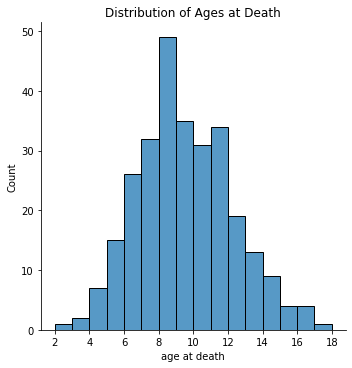

In [48]:
sns.displot(data_v1, x = 'age at death', binwidth = 1)
plt.title('Distribution of Ages at Death')
plt.show()

### Hair Length

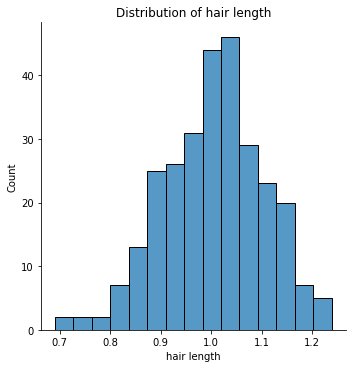

In [49]:
sns.displot(data_v1, x = 'hair length')
plt.title('Distribution of hair length')
plt.show()

### Height

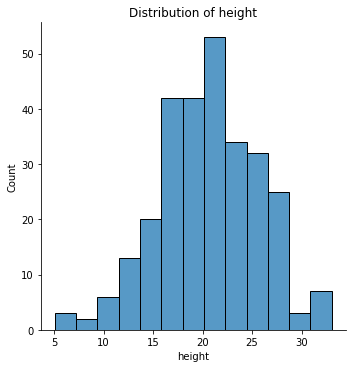

In [50]:
sns.displot(data_v1, x = 'height')
plt.title('Distribution of height')
plt.show()

### Number of Vet Visits

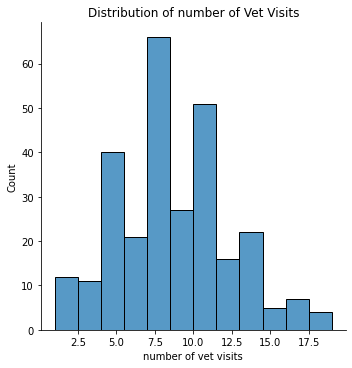

In [51]:
sns.displot(data_v1, x = 'number of vet visits')
plt.title('Distribution of number of Vet Visits')
plt.show()

### Weight

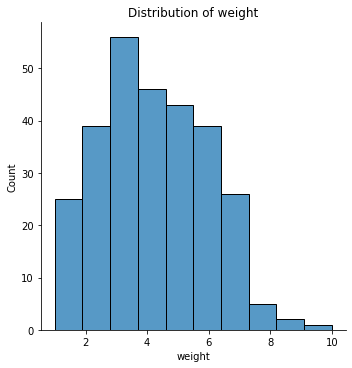

In [52]:
sns.displot(data_v1, x = 'weight')
plt.title('Distribution of weight')

plt.show()

### Pair Plot

Pairplots are useful plots to observe any relationship between two variables. 

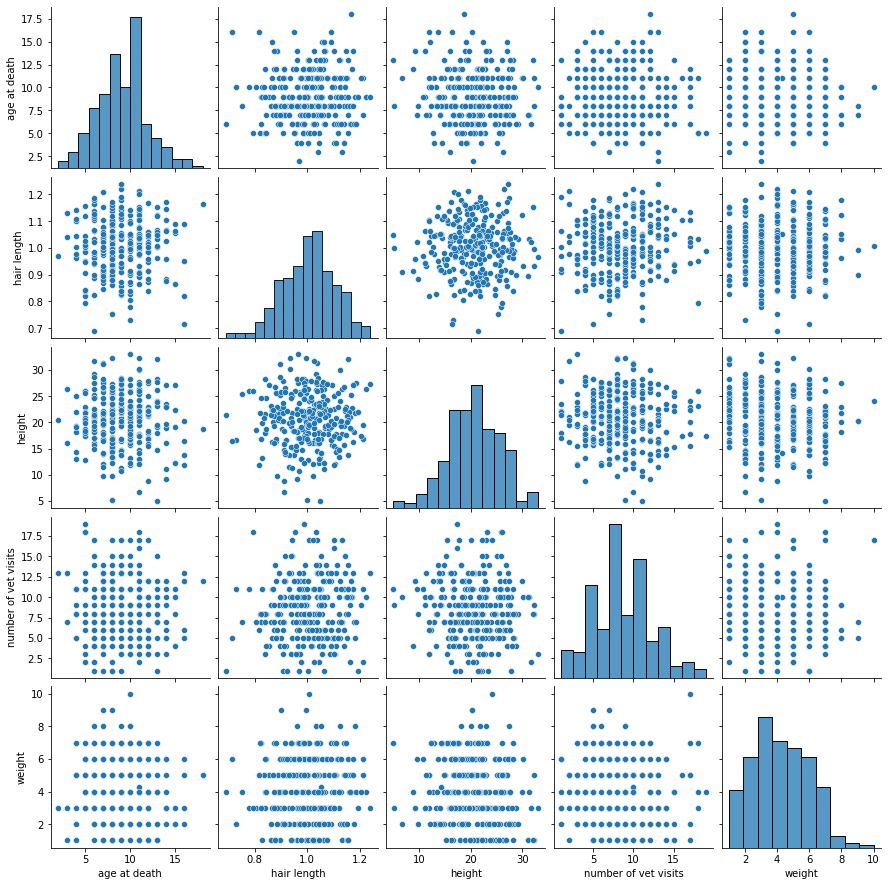

In [53]:
sns.pairplot(data_v1)
plt.show()

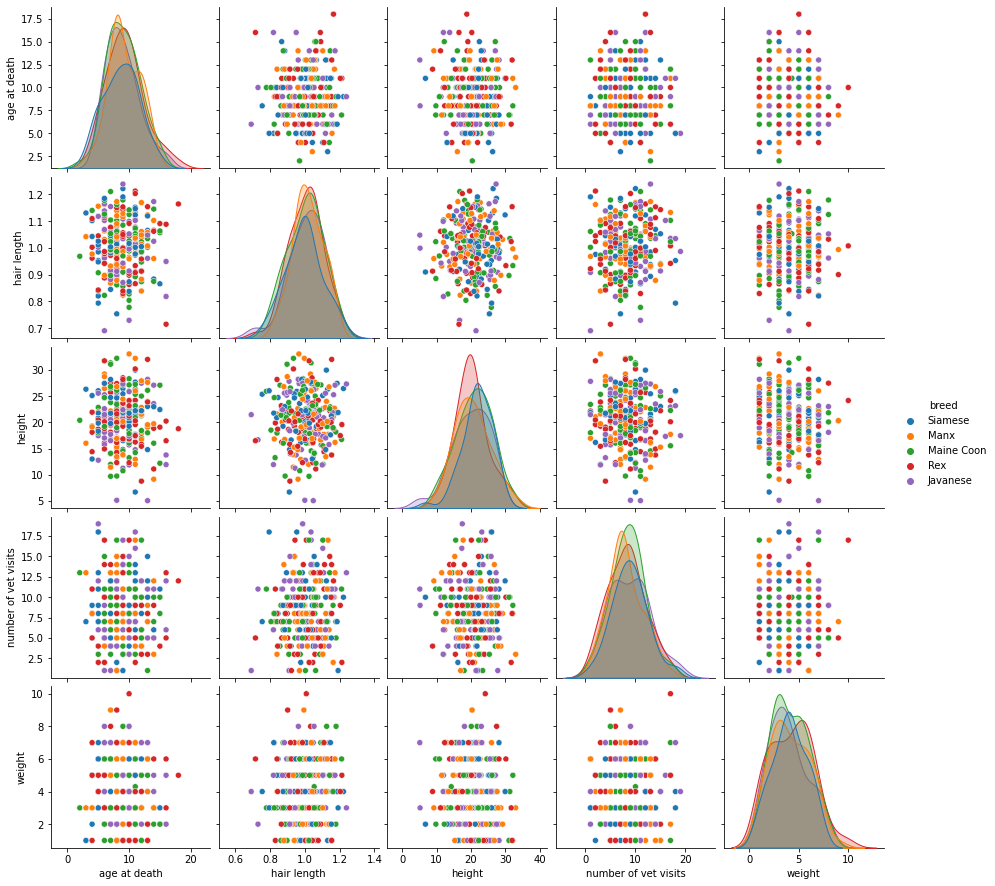

In [54]:
sns.pairplot(data_v1, hue = 'breed')
plt.show()

As seen in the above plots, they indicate they have little correlation with each other. 

# Feature Engineering

In [55]:
data_v1.head()

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
0,7.0,Siamese,2009-08-02 14:02:18,0.883886,21.611951,5,4.0
1,9.0,Siamese,2013-11-27 19:08:52,1.221535,26.451956,10,4.0
2,8.0,Manx,2016-01-12 04:39:24,0.967718,18.540191,10,5.0
3,8.0,Maine Coon,2000-11-24 18:51:18,1.090641,16.564362,12,7.0
4,8.0,Maine Coon,2014-07-03 22:17:26,1.004712,22.535495,7,7.0


In [56]:
data_v1.columns = data_v1.columns.str.replace(' ','_')

In [57]:
# Adds a columns for how many cats of a certain breed is observed in the data
breed_count = data_v1['breed'].value_counts().to_dict()
data_v1['breed'+'_count'] = data_v1['breed'].map(breed_count)

# Adds a columns for how many cats of a certain breed is observed in the data
visit_count = data_v1['number_of_vet_visits'].value_counts().to_dict()
data_v1['number_of_vet_visits'+'_count'] = data_v1['number_of_vet_visits'].map(visit_count)

weight_count = data_v1['weight'].value_counts().to_dict()
data_v1['weight'+'_count'] = data_v1['weight'].map(weight_count)

In [58]:
# Bins the weight range into 4 bins: ["underweight", "healthy", "overweight","obese"]
weight_level = pd.cut(data_v1['weight'], bins = 4, labels = ["underweight", "healthy", "overweight","obese"])
data_v1['weight_level'] = weight_level

In [59]:
# Adds information on the average hair length based on the breed
temp2 = data_v1.groupby('breed')['hair_length'].agg(['mean']).rename({'mean':'hair_length_mean'},axis=1)
data_v1 = pd.merge(data_v1,temp2,on='breed',how='left')

# Adds information on the average height based on the breed
temp3 = data_v1.groupby('breed')['height'].agg(['mean']).rename({'mean':'height_mean'},axis=1)
data_v1 = pd.merge(data_v1,temp3,on='breed',how='left')

# Adds information on the average number of vet vists based on the breed
temp4 = data_v1.groupby('breed')['number_of_vet_visits'].agg(['mean']).rename({'mean':'visit_mean'},axis=1)
data_v1 = pd.merge(data_v1,temp4,on='breed',how='left')

# Adds information on the average weight based on the breed
temp5 = data_v1.groupby('breed')['weight'].agg(['mean']).rename({'mean':'weight_mean'},axis=1)
data_v1 = pd.merge(data_v1,temp5,on='breed',how='left')

data_v1 = pd.get_dummies(data_v1, columns = ['breed'], prefix = ['breed'])
data_v1 = pd.get_dummies(data_v1, columns = ['weight_level'], prefix = ['weight_level'])


data_v1_fe = data_v1

# Extract year, month, week, day, hour, minute and day of the week
data_v1_fe['last_visit_year'] = data_v1_fe['date_of_last_vet_visit'].dt.year
data_v1_fe['last_visit_month'] = data_v1_fe['date_of_last_vet_visit'].dt.month
data_v1_fe['last_visit_week'] = data_v1_fe['date_of_last_vet_visit'].dt.week
data_v1_fe['last_visit_day'] = data_v1_fe['date_of_last_vet_visit'].dt.day
data_v1_fe['last_visit_hour'] = data_v1_fe['date_of_last_vet_visit'].dt.hour
data_v1_fe['last_visit_minute'] = data_v1_fe['date_of_last_vet_visit'].dt.minute
data_v1_fe['last_visit_dayofweek'] = data_v1_fe['date_of_last_vet_visit'].dt.dayofweek

data_v1_fe.head()

,age_at_death,date_of_last_vet_visit,hair_length,height,number_of_vet_visits,weight,breed_count,number_of_vet_visits_count,weight_count,hair_length_mean,...,weight_level_healthy,weight_level_overweight,weight_level_obese,last_visit_year,last_visit_month,last_visit_week,last_visit_day,last_visit_hour,last_visit_minute,last_visit_dayofweek
0,7.0,2009-08-02 14:02:18,0.883886,21.611951,5,4.0,49,25,45,0.992793,...,1,0,0,2009,8,31,2,14,2,6
1,9.0,2013-11-27 19:08:52,1.221535,26.451956,10,4.0,49,26,45,0.992793,...,1,0,0,2013,11,48,27,19,8,2
2,8.0,2016-01-12 04:39:24,0.967718,18.540191,10,5.0,55,26,43,1.015916,...,1,0,0,2016,1,2,12,4,39,1
3,8.0,2000-11-24 18:51:18,1.090641,16.564362,12,7.0,62,16,26,1.001184,...,0,1,0,2000,11,47,24,18,51,4
4,8.0,2014-07-03 22:17:26,1.004712,22.535495,7,7.0,62,33,26,1.001184,...,0,1,0,2014,7,27,3,22,17,3


In [60]:
data_v1_fe.columns

Index(['age_at_death', 'date_of_last_vet_visit', 'hair_length', 'height',
       'number_of_vet_visits', 'weight', 'breed_count',
       'number_of_vet_visits_count', 'weight_count', 'hair_length_mean',
       'height_mean', 'visit_mean', 'weight_mean', 'breed_Javanese',
       'breed_Maine Coon', 'breed_Manx', 'breed_Rex', 'breed_Siamese',
       'weight_level_underweight', 'weight_level_healthy',
       'weight_level_overweight', 'weight_level_obese', 'last_visit_year',
       'last_visit_month', 'last_visit_week', 'last_visit_day',
       'last_visit_hour', 'last_visit_minute', 'last_visit_dayofweek'],
      dtype='object')

Looking a newly made features....

In [61]:
data_v1_fe.columns

Index(['age_at_death', 'date_of_last_vet_visit', 'hair_length', 'height',
       'number_of_vet_visits', 'weight', 'breed_count',
       'number_of_vet_visits_count', 'weight_count', 'hair_length_mean',
       'height_mean', 'visit_mean', 'weight_mean', 'breed_Javanese',
       'breed_Maine Coon', 'breed_Manx', 'breed_Rex', 'breed_Siamese',
       'weight_level_underweight', 'weight_level_healthy',
       'weight_level_overweight', 'weight_level_obese', 'last_visit_year',
       'last_visit_month', 'last_visit_week', 'last_visit_day',
       'last_visit_hour', 'last_visit_minute', 'last_visit_dayofweek'],
      dtype='object')

In [62]:
data_v1_fe[['last_visit_year',
       'last_visit_month', 'last_visit_week', 'last_visit_day',
       'last_visit_hour', 'last_visit_minute', 'last_visit_dayofweek']].describe()

,last_visit_year,last_visit_month,last_visit_week,last_visit_day,last_visit_hour,last_visit_minute,last_visit_dayofweek
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,2007.010638,6.411348,25.904255,15.184397,11.379433,30.365248,2.978723
std,8.451446,3.505097,15.281512,8.920050,6.848228,18.081998,1.987391
min,1997.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2001.000000,3.000000,12.250000,8.000000,5.000000,14.000000,1.000000
50%,2007.000000,7.000000,27.000000,15.000000,12.000000,29.500000,3.000000
75%,2012.000000,9.000000,39.000000,22.750000,17.000000,48.000000,5.000000
max,2107.000000,12.000000,53.000000,31.000000,23.000000,59.000000,6.000000


Error of where the year is 2107. That is considered to be typo.

In [63]:
data_v1_fe['last_visit_year'] = data_v1_fe['last_visit_year'].replace(data_v1_fe['last_visit_year'].max(), 2017)

In [64]:
data_v1_fe[['last_visit_year',
       'last_visit_month', 'last_visit_week', 'last_visit_day',
       'last_visit_hour', 'last_visit_minute', 'last_visit_dayofweek']].describe()

,last_visit_year,last_visit_month,last_visit_week,last_visit_day,last_visit_hour,last_visit_minute,last_visit_dayofweek
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,2006.691489,6.411348,25.904255,15.184397,11.379433,30.365248,2.978723
std,6.008345,3.505097,15.281512,8.920050,6.848228,18.081998,1.987391
min,1997.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2001.000000,3.000000,12.250000,8.000000,5.000000,14.000000,1.000000
50%,2007.000000,7.000000,27.000000,15.000000,12.000000,29.500000,3.000000
75%,2012.000000,9.000000,39.000000,22.750000,17.000000,48.000000,5.000000
max,2017.000000,12.000000,53.000000,31.000000,23.000000,59.000000,6.000000


# Correlation Map

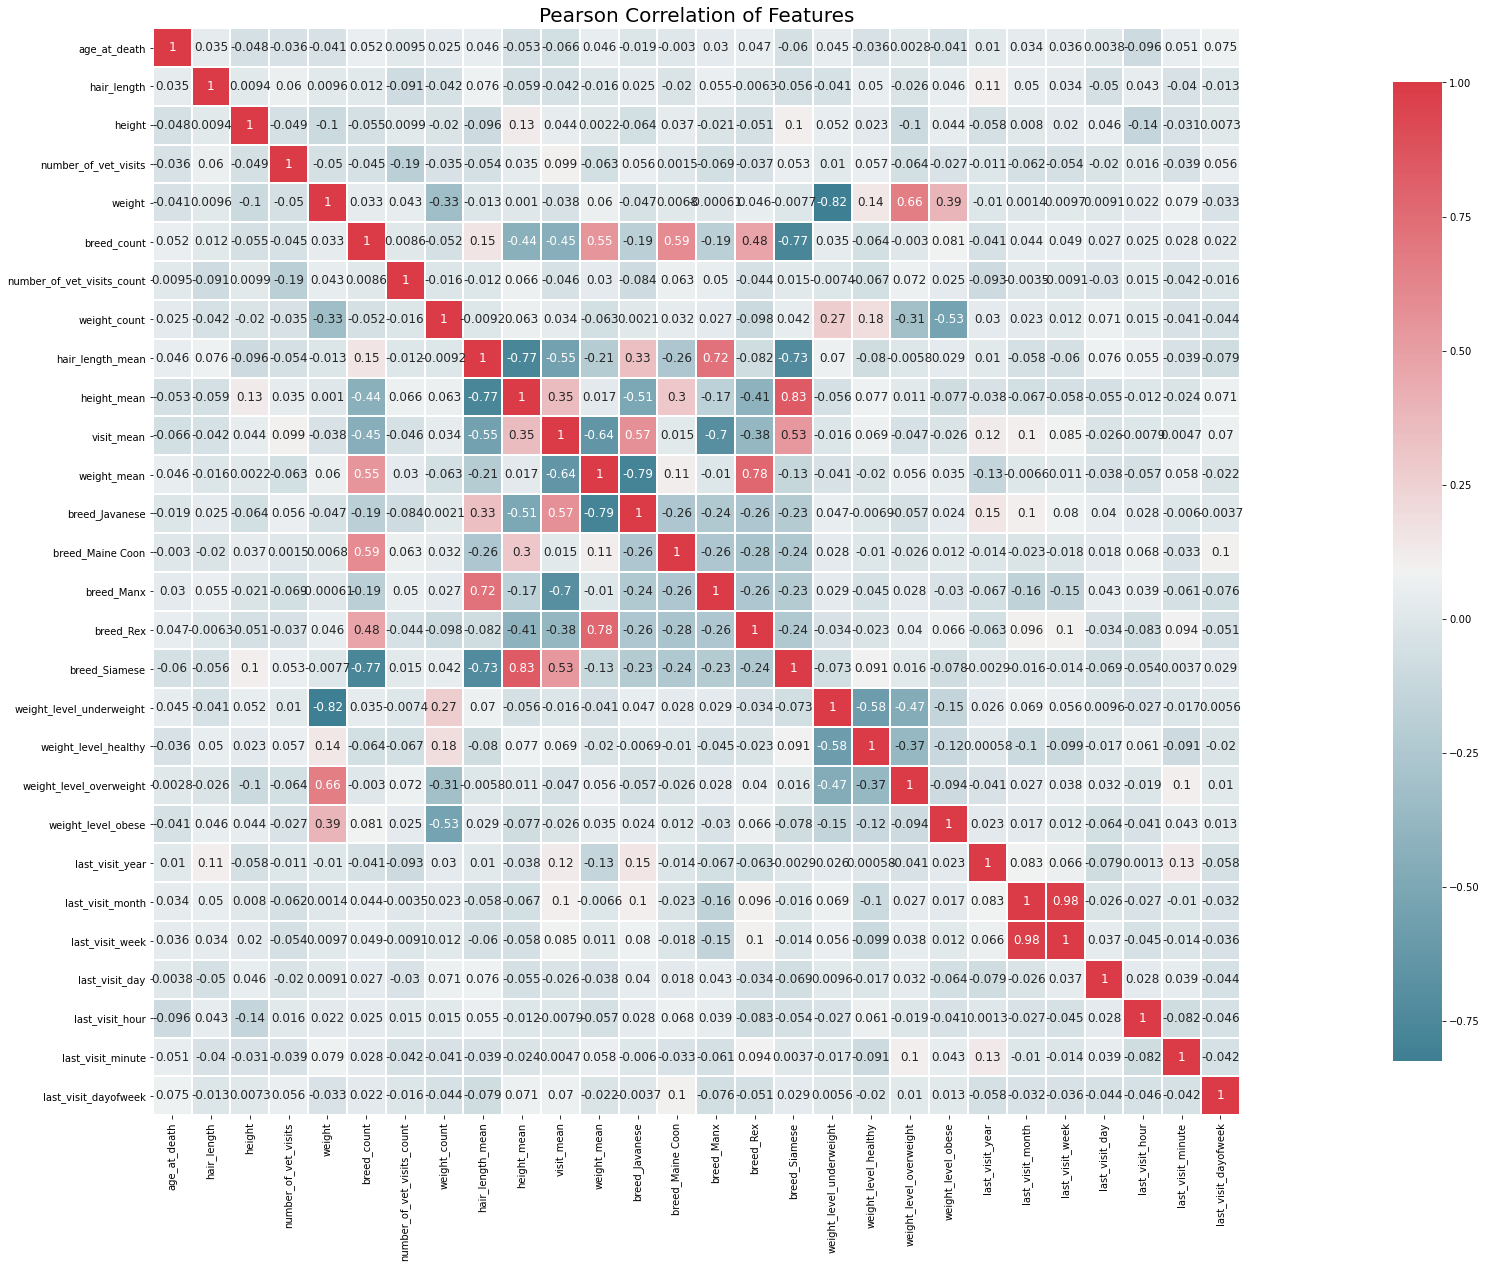

In [65]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(55, 20))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', fontsize = 20)

correlation_heatmap(data_v1_fe)

In [66]:
data_v1_fe.corr()

,age_at_death,hair_length,height,number_of_vet_visits,weight,breed_count,number_of_vet_visits_count,weight_count,hair_length_mean,height_mean,...,weight_level_healthy,weight_level_overweight,weight_level_obese,last_visit_year,last_visit_month,last_visit_week,last_visit_day,last_visit_hour,last_visit_minute,last_visit_dayofweek
age_at_death,1.000000,0.034770,-0.048385,-0.035582,-0.040515,0.052328,0.009537,0.024818,0.045868,-0.053100,...,-0.035576,0.002830,-0.040759,0.010257,0.033967,0.036454,0.003809,-0.096143,0.051129,0.074767
hair_length,0.034770,1.000000,0.009395,0.060043,0.009624,0.011628,-0.090618,-0.042474,0.076153,-0.058526,...,0.050353,-0.025567,0.045805,0.107326,0.049548,0.033714,-0.049578,0.042609,-0.039989,-0.012745
height,-0.048385,0.009395,1.000000,-0.049074,-0.101264,-0.054707,0.009856,-0.020117,-0.096203,0.125175,...,0.022650,-0.103177,0.044133,-0.058492,0.007998,0.020430,0.046225,-0.135880,-0.030656,0.007273
number_of_vet_visits,-0.035582,0.060043,-0.049074,1.000000,-0.050329,-0.044724,-0.186554,-0.034559,-0.054411,0.034942,...,0.056898,-0.063817,-0.027198,-0.010535,-0.062059,-0.053913,-0.020002,0.015601,-0.039307,0.056051
weight,-0.040515,0.009624,-0.101264,-0.050329,1.000000,0.032647,0.042698,-0.327347,-0.012779,0.001032,...,0.139486,0.659425,0.393303,-0.010279,0.001367,0.009704,0.009059,0.022440,0.078788,-0.032809
breed_count,0.052328,0.011628,-0.054707,-0.044724,0.032647,1.000000,0.008634,-0.052370,0.152698,-0.437041,...,-0.063532,-0.002956,0.081101,-0.041081,0.044459,0.048845,0.026969,0.024781,0.027741,0.021834
number_of_vet_visits_count,0.009537,-0.090618,0.009856,-0.186554,0.042698,0.008634,1.000000,-0.015786,-0.012207,0.066472,...,-0.066753,0.072493,0.024880,-0.093040,-0.003505,-0.009075,-0.030449,0.015359,-0.041862,-0.015639
weight_count,0.024818,-0.042474,-0.020117,-0.034559,-0.327347,-0.052370,-0.015786,1.000000,-0.009237,0.062730,...,0.183875,-0.307033,-0.534376,0.029695,0.022610,0.012407,0.070704,0.014643,-0.040587,-0.044238
hair_length_mean,0.045868,0.076153,-0.096203,-0.054411,-0.012779,0.152698,-0.012207,-0.009237,1.000000,-0.768542,...,-0.079511,-0.005766,0.029361,0.010263,-0.057949,-0.060164,0.076067,0.054575,-0.038565,-0.078925
height_mean,-0.053100,-0.058526,0.125175,0.034942,0.001032,-0.437041,0.066472,0.062730,-0.768542,1.000000,...,0.076674,0.011498,-0.077404,-0.037610,-0.067169,-0.057780,-0.054949,-0.011573,-0.024341,0.071040


In [67]:
corellation = data_v1_fe.corr()
corellation['age_at_death'].sort_values(ascending = False)

age_at_death                  1.000000
last_visit_dayofweek          0.074767
breed_count                   0.052328
last_visit_minute             0.051129
breed_Rex                     0.047078
weight_mean                   0.046355
hair_length_mean              0.045868
weight_level_underweight      0.044717
last_visit_week               0.036454
hair_length                   0.034770
last_visit_month              0.033967
breed_Manx                    0.030043
weight_count                  0.024818
last_visit_year               0.010257
number_of_vet_visits_count    0.009537
last_visit_day                0.003809
weight_level_overweight       0.002830
breed_Maine Coon             -0.003043
breed_Javanese               -0.018704
weight_level_healthy         -0.035576
number_of_vet_visits         -0.035582
weight                       -0.040515
weight_level_obese           -0.040759
height                       -0.048385
height_mean                  -0.053100
breed_Siamese            

# Splitting The Data

Prior to modelling, the data is split between the features and the target variable. Then, they will be split into 80% and 20% for training and testing respectively.

In [68]:
data_v1_fe.columns

Index(['age_at_death', 'date_of_last_vet_visit', 'hair_length', 'height',
       'number_of_vet_visits', 'weight', 'breed_count',
       'number_of_vet_visits_count', 'weight_count', 'hair_length_mean',
       'height_mean', 'visit_mean', 'weight_mean', 'breed_Javanese',
       'breed_Maine Coon', 'breed_Manx', 'breed_Rex', 'breed_Siamese',
       'weight_level_underweight', 'weight_level_healthy',
       'weight_level_overweight', 'weight_level_obese', 'last_visit_year',
       'last_visit_month', 'last_visit_week', 'last_visit_day',
       'last_visit_hour', 'last_visit_minute', 'last_visit_dayofweek'],
      dtype='object')

In [69]:
# Features 
X = data_v1_fe.drop(['age_at_death', 'date_of_last_vet_visit'], axis = 1)
y = data_v1_fe['age_at_death']

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [71]:
X_train.columns

Index(['hair_length', 'height', 'number_of_vet_visits', 'weight',
       'breed_count', 'number_of_vet_visits_count', 'weight_count',
       'hair_length_mean', 'height_mean', 'visit_mean', 'weight_mean',
       'breed_Javanese', 'breed_Maine Coon', 'breed_Manx', 'breed_Rex',
       'breed_Siamese', 'weight_level_underweight', 'weight_level_healthy',
       'weight_level_overweight', 'weight_level_obese', 'last_visit_year',
       'last_visit_month', 'last_visit_week', 'last_visit_day',
       'last_visit_hour', 'last_visit_minute', 'last_visit_dayofweek'],
      dtype='object')

# Modelling

## Linear Regression

Firstly, a simple LinearRegression model is used as Base Model. 

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# MAPE mean_absolute_percentage_error
def regMAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1.))) * 100
# MAE mean_absolute_error
def regMAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


# print_error
def regPrintErr(y_true, y_pred):
    print('MAPE: {}'.format(regMAPE(y_true, y_pred)))
    print('MAE: {}'.format(regMAE(y_true, y_pred)))
    print('R2 Score: {}'.format(r2_score(y_true, y_pred)))

In [74]:
model_base = LinearRegression()
model_base.fit(X_train, y_train)

LinearRegression()

In [75]:
model_base.coef_

array([-1.71496830e-01, -3.56203766e-02, -2.53378719e-02, -3.19115685e-02,
        3.56483236e-02,  3.93772182e-03,  1.57310388e-02,  2.69882407e-03,
       -1.77555565e-01, -9.41391467e-02,  6.73787098e-04,  2.15596307e-02,
       -8.68622966e-02,  1.19797796e-01,  2.63928017e-02, -8.08879316e-02,
        1.52603626e-01,  9.21501228e-02,  1.04985260e-01, -3.49739008e-01,
        7.21115876e-04, -2.72463089e-02,  1.35024755e-02,  1.31291500e-04,
       -2.68564260e-02,  9.61546509e-03,  1.91260730e-01])

In [76]:
y_pred_train = model_base.predict(X_train)
regPrintErr(y_train, y_pred_train)

MAPE: 25.003768532431714
MAE: 2.2411336518669933
R2 Score: 0.049612257662382975


Evaluating the performance of the model...

In [77]:
y_pred_base = model_base.predict(X_test)

regPrintErr(y_test, y_pred_base)

MAPE: 25.388349413235705
MAE: 2.0386999546996076
R2 Score: -0.14115925970048293


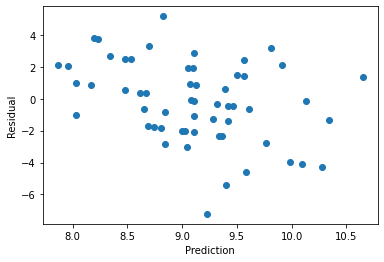

In [78]:
resid_base = y_test - y_pred_base
plt.scatter(y_pred_base, resid_base)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

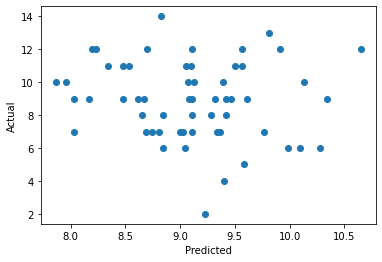

In [79]:
plt.scatter(y_pred_base, y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Forward Feature Selection

For R2

In [80]:
## Flag intermediate output

show_steps = False   # for testing/debugging
# show_steps = False  # without showing steps

## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the test data
n = X_test.shape[0]

r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_test[included + [new_column]], y_test)
        
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )
        
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for
    
    r2_list.append(best['r2'])
    adjusted_r2_list.append(best['a_r2'])

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))

Added feature last_visit_hour with R^2 = 0.024 and adjusted R^2 = 0.006
**************************************************

Resulting features:
last_visit_hour


In [81]:
model_base2 = LinearRegression()

model_base2.fit(X_train[included], y_train)

y_base_2 = model_base2.predict(X_test[included])

regPrintErr(y_test, y_base_2)

MAPE: 23.137381406861877
MAE: 1.8558156576601537
R2 Score: 0.023798460828260315


## Lasso and Ridge Regression

In [82]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

In [83]:
alphas_dist = np.logspace(-6, 6, 200)

# Ridge
optimal_ridge = RidgeCV(alphas = alphas_dist, cv=10)
optimal_ridge.fit(X_train, y_train)

# Lasso
optimal_lasso = LassoCV(alphas = alphas_dist, cv=10)
optimal_lasso.fit(X_train, y_train)

print('Alpha Ridge:', optimal_ridge.alpha_)
print('Alpha Lasso:', optimal_lasso.alpha_)

Alpha Ridge: 1000000.0
Alpha Lasso: 1000000.0


In [84]:
y_ridge = optimal_ridge.predict(X_test)
y_lasso = optimal_lasso.predict(X_test)

print('Ridge')
regPrintErr(y_test, y_ridge)
print('---------------------------------------')
print('Lasso')
regPrintErr(y_test, y_lasso)

Ridge
MAPE: 23.378524925591275
MAE: 1.8744070831439545
R2 Score: -0.005950398299126913
---------------------------------------
Lasso
MAPE: 23.367133191694585
MAE: 1.87485380116959
R2 Score: -0.0053090105030404455


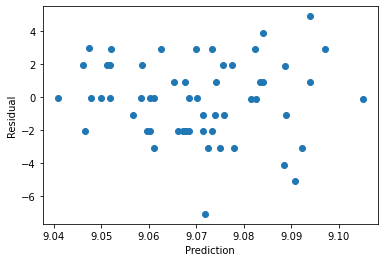

In [85]:
plt.scatter(y_ridge, y_test - y_ridge)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

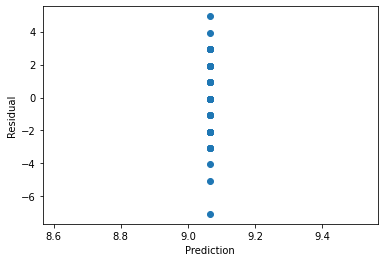

In [86]:
plt.scatter(y_lasso, y_test - y_lasso)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

## Decision Tree Regressor

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [88]:
model_dtr = DecisionTreeRegressor()

model_dtr.fit(X_train, y_train)

y_pred_dtr = model_dtr.predict(X_test)

regPrintErr(y_test, y_pred_dtr)

MAPE: 33.34940887572466
MAE: 2.8421052631578947
R2 Score: -1.382089552238806


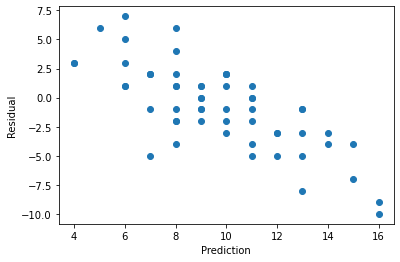

In [89]:
plt.scatter(y_pred_dtr, y_test - y_pred_dtr)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

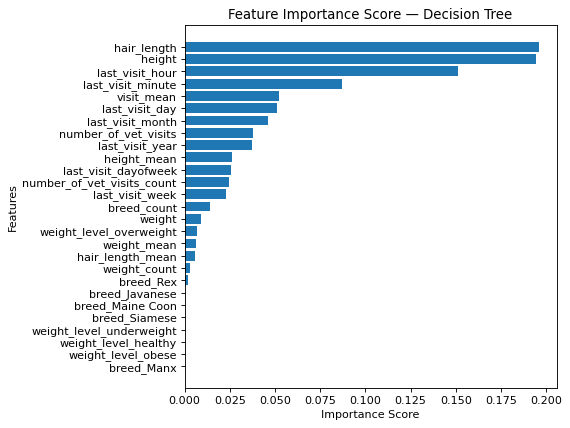

In [90]:
feature_importances = pd.DataFrame(model_dtr.feature_importances_,
 index = X.columns,
 columns=['importance']).sort_values('importance',
 ascending=False)
num = min([50,len(X.columns)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]
plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title("Feature Importance Score — Decision Tree")
plt.yticks(ylocs, feature_labels)
plt.show()

In [91]:
## Flag intermediate output

show_steps = False   # for testing/debugging
# show_steps = False  # without showing steps

## Use Forward Feature Selection to pick a good model

# start with no predictors
included_dtr = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = DecisionTreeRegressor()
# get the number of cases in the test data
n = X_test.shape[0]

r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included_dtr))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included_dtr + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included_dtr + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_test[included_dtr + [new_column]], y_test)
        
        # number of predictors in this model
        k = len(included_dtr) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )
        
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for
    
    r2_list.append(best['r2'])
    adjusted_r2_list.append(best['a_r2'])

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included_dtr.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included_dtr))

Added feature number_of_vet_visits with R^2 = 0.035 and adjusted R^2 = 0.018
Added feature weight_level_healthy with R^2 = 0.073 and adjusted R^2 = 0.039
**************************************************

Resulting features:
number_of_vet_visits, weight_level_healthy


In [92]:
corellation['age_at_death'].sort_values(ascending = False)

age_at_death                  1.000000
last_visit_dayofweek          0.074767
breed_count                   0.052328
last_visit_minute             0.051129
breed_Rex                     0.047078
weight_mean                   0.046355
hair_length_mean              0.045868
weight_level_underweight      0.044717
last_visit_week               0.036454
hair_length                   0.034770
last_visit_month              0.033967
breed_Manx                    0.030043
weight_count                  0.024818
last_visit_year               0.010257
number_of_vet_visits_count    0.009537
last_visit_day                0.003809
weight_level_overweight       0.002830
breed_Maine Coon             -0.003043
breed_Javanese               -0.018704
weight_level_healthy         -0.035576
number_of_vet_visits         -0.035582
weight                       -0.040515
weight_level_obese           -0.040759
height                       -0.048385
height_mean                  -0.053100
breed_Siamese            

In [93]:
model_dtr2 = DecisionTreeRegressor()

model_dtr2.fit(X_train[included_dtr], y_train)

y_pred_dtr2 = model_dtr2.predict(X_test[included_dtr])

regPrintErr(y_test, y_pred_dtr2)

MAPE: 22.815059146632677
MAE: 1.850535593291011
R2 Score: 0.073061364202052


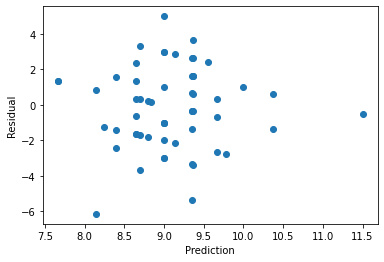

In [94]:
plt.scatter(y_pred_dtr2, y_test - y_pred_dtr2)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

## Random Forest Regressor

In [95]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor(n_estimators=10, random_state = 42)

model_rfr.fit(X_train, y_train)

y_pred_rfr = model_rfr.predict(X_test)

regPrintErr(y_test, y_pred_rfr)

MAPE: 26.15110279583963
MAE: 2.0666666666666673
R2 Score: -0.25154228855721406


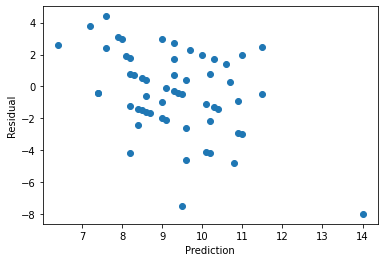

In [96]:
plt.scatter(y_pred_rfr, y_test - y_pred_rfr)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

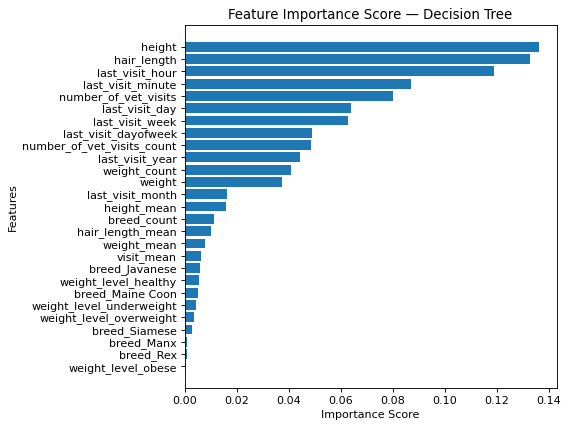

In [97]:
feature_importances = pd.DataFrame(model_rfr.feature_importances_, 
                                   index = X.columns,columns=['importance']).sort_values('importance', ascending=False)
num = min([50,len(X.columns)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]
plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title("Feature Importance Score — Decision Tree")
plt.yticks(ylocs, feature_labels)
plt.show()

In [98]:
## Flag intermediate output

show_steps = False   # for testing/debugging
# show_steps = False  # without showing steps

## Use Forward Feature Selection to pick a good model

# start with no predictors
included_rfr = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = RandomForestRegressor(n_estimators=10, random_state = 42)
# get the number of cases in the test data
n = X_test.shape[0]

r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included_rfr))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included_rfr + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included_rfr + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_test[included_rfr + [new_column]], y_test)
        
        # number of predictors in this model
        k = len(included_rfr) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )
        
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for
    
    r2_list.append(best['r2'])
    adjusted_r2_list.append(best['a_r2'])

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included_rfr.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included_rfr))

Added feature number_of_vet_visits with R^2 = 0.055 and adjusted R^2 = 0.038
Added feature weight_level_healthy with R^2 = 0.073 and adjusted R^2 = 0.038
Added feature breed_Rex with R^2 = 0.106 and adjusted R^2 = 0.056
Added feature weight_level_obese with R^2 = 0.124 and adjusted R^2 = 0.056
**************************************************

Resulting features:
number_of_vet_visits, weight_level_healthy, breed_Rex, weight_level_obese


In [99]:
model_rfr2 = RandomForestRegressor(n_estimators= 10, random_state = 42)

model_rfr2.fit(X_train[included_rfr], 
               y_train)

y_pred_rfr2 = model_rfr2.predict(X_test[included_rfr])

regPrintErr(y_test, y_pred_rfr2)

MAPE: 21.184151532407565
MAE: 1.8122147080323538
R2 Score: 0.12371069877841867


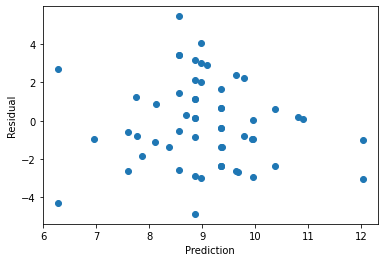

In [100]:
plt.scatter(y_pred_rfr2, y_test - y_pred_rfr2)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

# Summary
**Random Forest Regressor**, under current analysis, performed the best for predicting the life expectancy of a cat.
- **MAPE** indicates 80% accuracy
- **R2** Score is considered low
Modelling improved (with negative to positive R2 Score) through feature selection for both linear and non-linear regression models.

# Further Work
Review of the dataset and data cleaning
- Increase data size
- Data imputation instead of deleting entries 

Further testing of other regression and further research into feature engineering